In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [161]:
X, y = load_digits(return_X_y=True)
print('shape of the X:', X.shape)
print('Shape of the y:', y.shape)

shape of the X: (1797, 64)
Shape of the y: (1797,)


In [162]:
lr = RandomForestClassifier(n_estimators=100)
lr.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [163]:
lr.score(X,y)

1.0

In [164]:
#Drawing Validation Curve

In [165]:
pr = np.array([100,150,200,250,300])
train_scores, test_scores = validation_curve(RandomForestClassifier(), X,y, cv=5, param_name='n_estimators', param_range=pr, scoring='accuracy', n_jobs=1, error_score='raise' )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

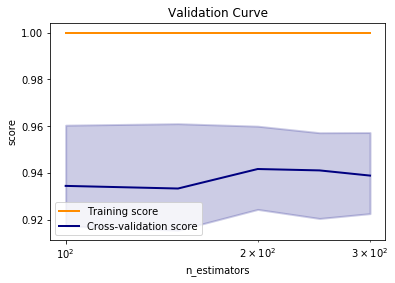

In [166]:
plt.semilogx(pr, train_mean, label="Training score", color="darkorange", lw=2)
plt.semilogx(pr, test_mean, label="Cross-validation score", color="navy", lw=2)


plt.fill_between(pr, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange", lw=2)
plt.fill_between(pr, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy", lw=2)


plt.xlabel('n_estimators')
plt.ylabel('score')
plt.title('Validation Curve')
plt.legend(loc='best')

In [167]:
#Drawing Learning Curve

In [168]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X,y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes = np.linspace(.1,1,50), verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[learning_curve] Training set sizes: [ 143  169  195  222  248  274  301  327  353  380  406  432  459  485
  511  538  564  590  617  643  669  696  722  748  774  801  827  853
  880  906  932  959  985 1011 1038 1064 1090 1117 1143 1169 1196 1222
 1248 1275 1301 1327 1354 1380 1406 1433]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.1s finished


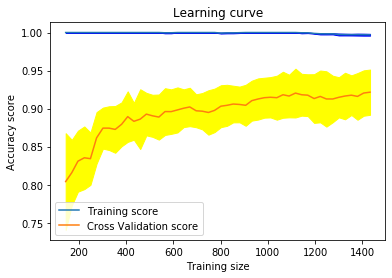

In [169]:
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross Validation score')

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color = 'blue')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color = 'yellow')

plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.title('Learning curve')
plt.legend(loc='best')